In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
import random
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

seed_value = 24
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [5]:
df = pd.read_csv('clean_df (1).csv')
df.head()

,Dependents,Year,MHA,E1,E2,E3,E4,E5,E6,E7,...,ZIP,Latitude,Longitude,CITY,STATE,Average CPI,Senate Majority Party,House Majority Party,President Party,Index (NSA)
0,1,1998,AK404,705.82,712.59,733.66,839.38,999.44,1061.71,1157.26,...,99505,61.266470,-149.641223,ANCHORAGE,AK,163.008333,1,1,0,110.80
1,1,1998,AK404,705.82,712.59,733.66,839.38,999.44,1061.71,1157.26,...,99505,61.266470,-149.641223,ANCHORAGE,AK,163.008333,1,1,0,113.01
2,0,1998,AK404,491.00,491.00,540.24,586.61,697.99,722.65,804.40,...,99505,61.266470,-149.641223,ANCHORAGE,AK,163.008333,1,1,0,110.80
3,0,1998,AK404,491.00,491.00,540.24,586.61,697.99,722.65,804.40,...,99505,61.266470,-149.641223,ANCHORAGE,AK,163.008333,1,1,0,113.01
4,1,1998,AL001,371.70,371.70,390.30,419.40,482.40,536.40,580.50,...,36201,33.652278,-85.968851,ANNISTON/FORT MCCLELLAN,AL,163.008333,1,1,0,117.62


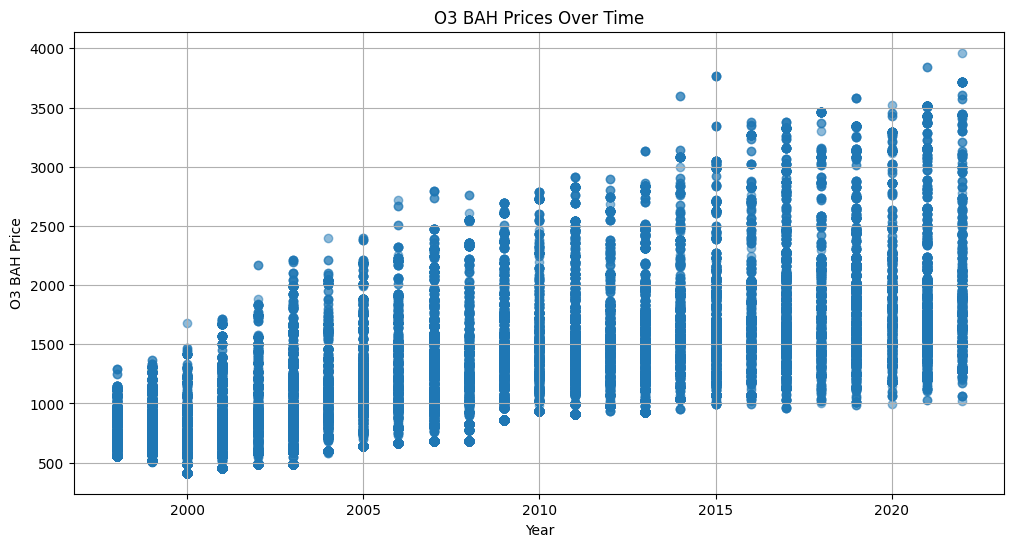

In [6]:
plt.figure(figsize=(12, 6))
plt.scatter(df["Year"], df["O3"], alpha=0.5, marker="o")

plt.xlabel("Year")
plt.ylabel("O3 BAH Price")
plt.title("O3 BAH Prices Over Time")
plt.grid(True)

plt.show()

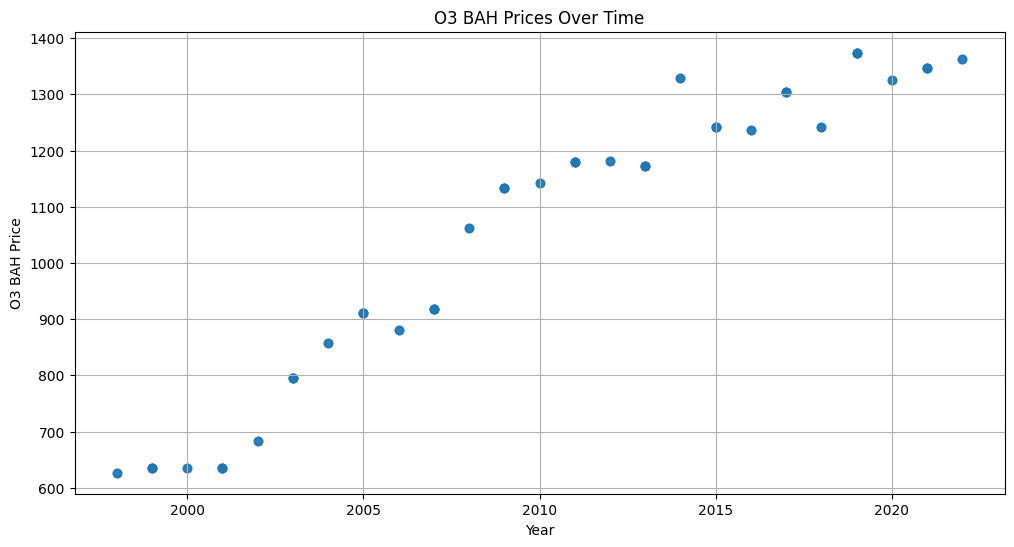

In [7]:
wp_df = df[df["MHA"] == "OH231"].copy()
wp_df = wp_df[wp_df["Dependents"] != 1]

plt.figure(figsize=(12, 6))
plt.scatter(wp_df["Year"], wp_df["O3"], alpha=0.5, marker="o")

plt.xlabel("Year")
plt.ylabel("O3 BAH Price")
plt.title("O3 BAH Prices Over Time")
plt.grid(True)

plt.show()

In [8]:
wp_df

,Dependents,Year,MHA,E1,E2,E3,E4,E5,E6,E7,...,ZIP,Latitude,Longitude,CITY,STATE,Average CPI,Senate Majority Party,House Majority Party,President Party,Index (NSA)
418,0,1998,OH231,327.0,327.0,358.79,354.57,416.56,420.77,497.58,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,163.008333,1,1,0,113.98
419,0,1998,OH231,327.0,327.0,358.79,354.57,416.56,420.77,497.58,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,163.008333,1,1,0,114.28
420,0,1998,OH231,327.0,327.0,358.79,354.57,416.56,420.77,497.58,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,163.008333,1,1,0,110.55
421,0,1998,OH231,327.0,327.0,358.79,354.57,416.56,420.77,497.58,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,163.008333,1,1,0,118.83
2104,0,1999,OH231,339.0,339.0,366.00,362.00,430.00,442.00,512.00,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,166.575000,1,1,0,118.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43585,0,2021,OH231,936.0,936.0,936.00,936.00,1020.00,1080.00,1131.00,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,270.969750,0,0,0,180.62
45724,0,2022,OH231,981.0,981.0,981.00,981.00,1077.00,1134.00,1179.00,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,292.654917,0,0,0,255.51
45725,0,2022,OH231,981.0,981.0,981.00,981.00,1077.00,1134.00,1179.00,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,292.654917,0,0,0,209.14
45726,0,2022,OH231,981.0,981.0,981.00,981.00,1077.00,1134.00,1179.00,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,292.654917,0,0,0,197.69


Mostly linear but some curve so we'll compare to a linear model.

<Figure size 1000x500 with 0 Axes>

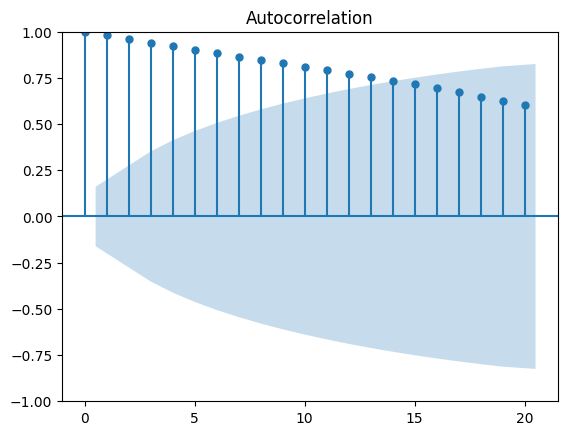

In [9]:
plt.figure(figsize=(10, 5))
plot_acf(wp_df["O3"], lags=20)  # Check up to 20 years of lag
plt.show()

🔍 Key Observations:
High Autocorrelation at Lower Lags:

The first few lags have very high positive autocorrelation (close to 1), indicating strong dependency on previous values.
This suggests that the time series is highly persistent (values in one period strongly influence future values).
Slow Decay of Autocorrelation:

The autocorrelation gradually declines over time but remains significant even after 20 lags.
This indicates the presence of a long-term trend, meaning the data is non-stationary (it likely has an upward or downward trend).
Confidence Interval (Shaded Region):

The blue shaded area represents the 95% confidence interval.
Most lags remain outside this region, meaning the correlations are statistically significant.
📊 Interpretation:
Non-stationary Series: Since autocorrelation remains high and declines slowly, the data likely has a trend.

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(wp_df["O3"])
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

ADF Statistic: -1.127866663755396, p-value: 0.7038320533261972


barely not statistical over time, but we'll still push

next, what features should we include? Only want to include those with high correlation

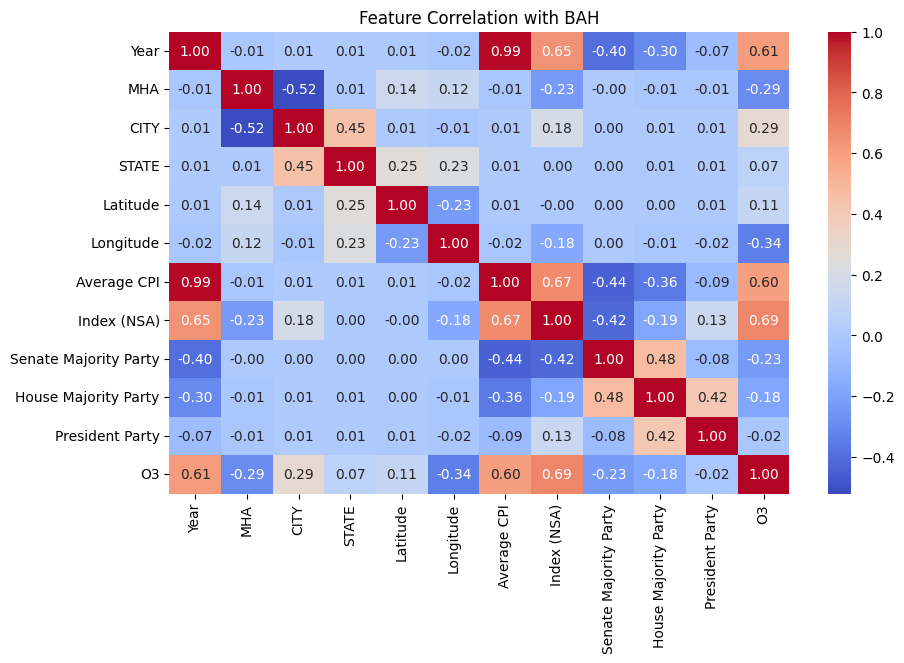

In [11]:
#encode categorical as integers
label_encoders = {}
categorical_features = ["MHA", "CITY", "STATE", "ZIP"]

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

features2 = ["Year", "MHA", "CITY", "STATE", "Latitude", "Longitude", "Average CPI", "Index (NSA)",
            "Senate Majority Party", "House Majority Party", "President Party", "O3"]

#correlation matrix
correlation_matrix = df[features2].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation with BAH")
plt.show()

Year, average CPI, index

In [12]:
#encode categorical as integers
label_encoders = {}
categorical_features = ["MHA", "CITY", "STATE"]

for feature in categorical_features:
    le = LabelEncoder()
    wp_df[feature] = le.fit_transform(wp_df[feature])
    label_encoders[feature] = le

In [13]:
df_clean = pd.read_csv('clean_df (1).csv')
df_clean.head()

,Dependents,Year,MHA,E1,E2,E3,E4,E5,E6,E7,...,ZIP,Latitude,Longitude,CITY,STATE,Average CPI,Senate Majority Party,House Majority Party,President Party,Index (NSA)
0,1,1998,AK404,705.82,712.59,733.66,839.38,999.44,1061.71,1157.26,...,99505,61.266470,-149.641223,ANCHORAGE,AK,163.008333,1,1,0,110.80
1,1,1998,AK404,705.82,712.59,733.66,839.38,999.44,1061.71,1157.26,...,99505,61.266470,-149.641223,ANCHORAGE,AK,163.008333,1,1,0,113.01
2,0,1998,AK404,491.00,491.00,540.24,586.61,697.99,722.65,804.40,...,99505,61.266470,-149.641223,ANCHORAGE,AK,163.008333,1,1,0,110.80
3,0,1998,AK404,491.00,491.00,540.24,586.61,697.99,722.65,804.40,...,99505,61.266470,-149.641223,ANCHORAGE,AK,163.008333,1,1,0,113.01
4,1,1998,AL001,371.70,371.70,390.30,419.40,482.40,536.40,580.50,...,36201,33.652278,-85.968851,ANNISTON/FORT MCCLELLAN,AL,163.008333,1,1,0,117.62


In [14]:
#remove all rows containing 2022
df_clean = df_clean[df_clean["Year"] != 2022]
#remove all rows where dependent == 1
df_clean = df_clean[df_clean["Dependents"] != 1]

In [42]:
#trains LSTM to predict future BAH given rank and MHA
#takes in dataframe, rank, MHA, epochs, dimensions, layers, learning rate, and sequence length
#returns model, scaler x, scaler y, and test sets for validation
def train_bah_lstm(df, rank, mha, epochs=1000, hidden_dim=64, num_layers=2, lr=0.005, sequence_length=5):
    #filter dataset by MHA
    df_mha = df[df["MHA"] == mha].copy()

    #select features
    features = ["Year", "Average CPI", "Index (NSA)"]
    target = rank
    X = df_mha[features].values
    y = df_mha[target].values.reshape(-1, 1)

    #normalize
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)

    #sequences
    def create_sequences(data_X, data_y, seq_length):
        X_seq, y_seq = [], []
        for i in range(len(data_X) - seq_length):
            X_seq.append(data_X[i:i + seq_length])
            y_seq.append(data_y[i + seq_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)

    #split data
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, shuffle=False)

    #pytorth tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    #define model
    class BAH_LSTM(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, output_size):
            super(BAH_LSTM, self).__init__()
            self.hidden_size = hidden_size
            self.num_layers = num_layers
            self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
            self.fc = nn.Linear(hidden_size, output_size)

        def forward(self, x):
            h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
            c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

            out, _ = self.lstm(x, (h0, c0))
            out = self.fc(out[:, -1, :])  # Take only the last timestep output
            return out

    #initialize model, loss function, and optimizer
    input_dim = X_train.shape[2]
    model = BAH_LSTM(input_dim, hidden_dim, num_layers, 1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    #train
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        #if (epoch + 1) % 10 == 0:
            #print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

    print("Training complete!")

    return model, scaler_X, scaler_y, X_test, y_test

In [43]:
model, scaler_x, scaler_y, x_test, y_test = train_bah_lstm(df_clean, rank="O3", mha="OH231")

Training complete!


model evaluation

In [17]:
#evaluate LSTM model
#take in model, test sets, and scaler y
#return RMSE, MAE, R2, and accuracy
def evaluate_lstm_model(model, X_test, y_test, scaler_y):
    #eval mode
    model.eval()

    #convert test set to PyTorch tensor if it's not already
    if isinstance(X_test, np.ndarray):
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    else:
        X_test_tensor = X_test

    #gradient calculations
    with torch.no_grad():
        test_predictions = model(X_test_tensor).cpu().numpy()  # Convert to NumPy

    #inverse scaling
    y_test_unscaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))
    test_predictions_unscaled = scaler_y.inverse_transform(test_predictions.reshape(-1, 1))

    #evaluation Metrics
    test_rmse = mean_squared_error(y_test_unscaled, test_predictions_unscaled)  # RMSE
    test_mae = mean_absolute_error(y_test_unscaled, test_predictions_unscaled)  # MAE
    test_r2 = r2_score(y_test_unscaled, test_predictions_unscaled)  # R² Score

    #compute Accuracy: % of predictions within ±5% of actual values
    tolerance = 0.05  # 5% margin
    within_tolerance = np.abs((test_predictions_unscaled - y_test_unscaled) / y_test_unscaled) <= tolerance
    accuracy = np.mean(within_tolerance) * 100  # Convert to percentage

    #print results
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test R² Score: {test_r2:.4f}")
    print(f"Prediction Accuracy (within ±5%): {accuracy:.2f}%")

    return test_rmse, test_mae, test_r2, accuracy

In [18]:
test_rmse, test_mae, test_r2, accuracy = evaluate_lstm_model(model, x_test, y_test, scaler_y)

Test RMSE: 1309.22
Test MAE: 30.17
Test R² Score: 0.2858
Prediction Accuracy (within ±5%): 89.29%


model testing (2022) and prediction for 2023

In [19]:
#predict future BAH with projected CPI and Index (NSA)
#take in model, scaler x, scaler y, year, mha, and data
#return predicted BAH
def predict_future_bah(model, scaler_X, scaler_y, year, mha, df):
    #filter
    df_mha = df[df["MHA"] == mha].copy()

    #features
    features = ["Year", "Average CPI", "Index (NSA)"]

    #ensure we have enough data to form a sequence (last 5 years)
    sequence_length = 5
    recent_data = df_mha[features].iloc[-sequence_length:].values

    #predict CPI and Index (NSA) for the future year
    avg_cpi_growth = df_mha["Average CPI"].pct_change().mean()
    avg_index_growth = df_mha["Index (NSA)"].pct_change().mean()

    future_cpi = df_mha["Average CPI"].iloc[-1] * (1 + avg_cpi_growth)
    future_index = df_mha["Index (NSA)"].iloc[-1] * (1 + avg_index_growth)

    #create the input sequence for the future year
    future_input = np.append(recent_data[1:], [[year, future_cpi, future_index]], axis=0)

    #normalize input using the trained scaler
    future_input_scaled = scaler_X.transform(future_input)

    #convert to PyTorch tensor
    future_input_tensor = torch.tensor(future_input_scaled, dtype=torch.float32).unsqueeze(0)  # Add batch dimension

    #ensure model is in evaluation mode
    model.eval()

    #run inference
    with torch.no_grad():
        scaled_prediction = model(future_input_tensor).numpy()

    #convert prediction back to original scale
    unscaled_prediction = scaler_y.inverse_transform(scaled_prediction)[0][0]

    return unscaled_prediction

In [18]:
# with predicted CPI and Index
predicted_bah = predict_future_bah(model, scaler_x, scaler_y, year=2022, mha="OH231", df=df_clean)
print(f"Predicted BAH for OH231 in 2022: ${predicted_bah:.2f}")

Predicted BAH for OH231 in 2022: $1361.17


In [19]:
# with predicted CPI and Index
predicted_bah = predict_future_bah(model, scaler_x, scaler_y, year=2023, mha="OH231", df=df_clean)
print(f"Predicted BAH for OH231 in 2023: ${predicted_bah:.2f}")

Predicted BAH for OH231 in 2023: $1362.08


In [20]:
#predict future BAH with user input cpi and index
#take in model, scaler x, scaler y, year, mha, cpi, index, data
#return predicted BAH
def predict_future_bah_manual(model, scaler_X, scaler_y, year, mha, cpi, index_nsa, df):
    #filter dataset by MHA
    df_mha = df[df["MHA"] == mha].copy()

    #select relevant features
    features = ["Year", "Average CPI", "Index (NSA)"]

    #ensure we have enough data to form a sequence (last 5 years)
    sequence_length = 5
    recent_data = df_mha[features].iloc[-sequence_length:].values

    #create the input sequence for the future year using user input for CPI and Index
    future_input = np.append(recent_data[1:], [[year, cpi, index_nsa]], axis=0)

    #normalize input using the trained scaler
    future_input_scaled = scaler_X.transform(future_input)

    #convert to PyTorch tensor
    future_input_tensor = torch.tensor(future_input_scaled, dtype=torch.float32).unsqueeze(0)  # Add batch dimension

    #ensure model is in evaluation mode
    model.eval()

    #run inference
    with torch.no_grad():
        scaled_prediction = model(future_input_tensor).numpy()

    #convert prediction back to original scale
    unscaled_prediction = scaler_y.inverse_transform(scaled_prediction)[0][0]

    return unscaled_prediction

In [21]:
#get CPI and Index (NSA) for 2022 from wp_df and BAH for O3
cpi_2022 = wp_df[wp_df["Year"] == 2022]["Average CPI"].iloc[0]
index_nsa_2022 = wp_df[wp_df["Year"] == 2022]["Index (NSA)"].iloc[0]
print(f"CPI for 2022: {cpi_2022}")
print(f"Index (NSA) for 2022: {index_nsa_2022}")
bah_2022 = wp_df[wp_df["Year"] == 2022]["O3"].iloc[0]
print(f"BAH for 2022: {bah_2022}")

CPI for 2022: 292.6549166666667
Index (NSA) for 2022: 255.51
BAH for 2022: 1362.0


In [22]:
val_df = pd.read_csv('clean_val_df.csv')
val_df.head()

,Dependents,Year,MHA,E1,E2,E3,E4,E5,E6,E7,...,ZIP,Latitude,Longitude,CITY,STATE,Average CPI,Senate Majority Party,House Majority Party,President Party,Index (NSA)
0,1,2023,AK404,1995.0,1995.0,1995.0,1995.0,2331.0,2349.0,2493.0,...,99505,61.26647,-149.641223,ANCHORAGE,AK,304.701583,0,0,0,282.98
1,1,2023,AK404,1995.0,1995.0,1995.0,1995.0,2331.0,2349.0,2493.0,...,99505,61.26647,-149.641223,ANCHORAGE,AK,304.701583,0,0,0,312.77
2,1,2023,AK404,1995.0,1995.0,1995.0,1995.0,2331.0,2349.0,2493.0,...,99505,61.26647,-149.641223,ANCHORAGE,AK,304.701583,1,0,0,282.98
3,1,2023,AK404,1995.0,1995.0,1995.0,1995.0,2331.0,2349.0,2493.0,...,99505,61.26647,-149.641223,ANCHORAGE,AK,304.701583,1,0,0,312.77
4,0,2023,AK404,1497.0,1497.0,1497.0,1497.0,1749.0,1761.0,1869.0,...,99505,61.26647,-149.641223,ANCHORAGE,AK,304.701583,0,0,0,282.98


In [23]:
val_df = val_df[val_df["MHA"] == "OH231"].copy()
val_df = val_df[val_df["Dependents"] != 1]
val_df.head()

,Dependents,Year,MHA,E1,E2,E3,E4,E5,E6,E7,...,ZIP,Latitude,Longitude,CITY,STATE,Average CPI,Senate Majority Party,House Majority Party,President Party,Index (NSA)
852,0,2023,OH231,984.0,984.0,984.0,984.0,1119.0,1212.0,1308.0,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,304.701583,0,0,0,282.30
853,0,2023,OH231,984.0,984.0,984.0,984.0,1119.0,1212.0,1308.0,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,304.701583,0,0,0,228.45
854,0,2023,OH231,984.0,984.0,984.0,984.0,1119.0,1212.0,1308.0,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,304.701583,0,0,0,213.44
855,0,2023,OH231,984.0,984.0,984.0,984.0,1119.0,1212.0,1308.0,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,304.701583,0,0,0,235.36
856,0,2023,OH231,984.0,984.0,984.0,984.0,1119.0,1212.0,1308.0,...,45433,39.821905,-84.049589,WRIGHT-PATTERSON AFB,OH,304.701583,1,0,0,282.30


In [25]:
#get CPI and Index (NSA) for 2023, 2024 from wp_df and BAH for O3
cpi_2023 = val_df[val_df["Year"] == 2023]["Average CPI"].iloc[0]
index_nsa_2023 = val_df[val_df["Year"] == 2023]["Index (NSA)"].iloc[0]
print(f"CPI for 2023: {cpi_2023}")
print(f"Index (NSA) for 2023: {index_nsa_2023}")
bah_2023 = val_df[val_df["Year"] == 2023]["O3"].iloc[0]
print(f"BAH for 2023: {bah_2023}")

cpi_2024 = val_df[val_df["Year"] == 2024]["Average CPI"].iloc[0]
index_nsa_2024 = val_df[val_df["Year"] == 2024]["Index (NSA)"].iloc[0]
print(f"CPI for 2024: {cpi_2024}")
print(f"Index (NSA) for 2024: {index_nsa_2024}")
bah_2024 = val_df[val_df["Year"] == 2024]["O3"].iloc[0]
print(f"BAH for 2024: {bah_2024}")

CPI for 2023: 304.7015833333333
Index (NSA) for 2023: 282.3
BAH for 2023: 1512.0
CPI for 2024: 313.6888333333333
Index (NSA) for 2024: 304.99
BAH for 2024: 1572.0


In [26]:
predicted_bah = predict_future_bah_manual(model, scaler_x, scaler_y, year=2022, mha="OH231", cpi=292.6549, index_nsa=255.51, df=df_clean)
print(f"Predicted BAH for OH231 in 2022: ${predicted_bah:.2f}")

Predicted BAH for OH231 in 2022: $1385.81


In [27]:
#for manual
predicted_bah = predict_future_bah_manual(model, scaler_x, scaler_y, year=2023, mha="OH231", cpi=304.7, index_nsa=282.3, df=df_clean)
print(f"Predicted BAH for OH231 in 2023: ${predicted_bah:.2f}")

Predicted BAH for OH231 in 2023: $1390.97


In [28]:
#for manual
predicted_bah = predict_future_bah_manual(model, scaler_x, scaler_y, year=2024, mha="OH231", cpi=313.7, index_nsa=304.99, df=df_clean)
print(f"Predicted BAH for OH231 in 2023: ${predicted_bah:.2f}")

Predicted BAH for OH231 in 2023: $1395.03


The actual BAH for 2023 was $1362
Now let's look at a linear regression model and see if we get similar results.

In [38]:
df_clean.head()

,Dependents,Year,MHA,E1,E2,E3,E4,E5,E6,E7,...,ZIP,Latitude,Longitude,CITY,STATE,Average CPI,Senate Majority Party,House Majority Party,President Party,Index (NSA)
2,0,1998,AK404,491.0,491.0,540.24,586.61,697.99,722.65,804.4,...,99505,61.266470,-149.641223,ANCHORAGE,AK,163.008333,1,1,0,110.80
3,0,1998,AK404,491.0,491.0,540.24,586.61,697.99,722.65,804.4,...,99505,61.266470,-149.641223,ANCHORAGE,AK,163.008333,1,1,0,113.01
8,0,1998,AL001,254.0,254.0,287.40,293.10,336.90,365.10,403.5,...,36201,33.652278,-85.968851,ANNISTON/FORT MCCLELLAN,AL,163.008333,1,1,0,117.62
9,0,1998,AL001,254.0,254.0,287.40,293.10,336.90,365.10,403.5,...,36201,33.652278,-85.968851,ANNISTON/FORT MCCLELLAN,AL,163.008333,1,1,0,116.19
10,0,1998,AL001,254.0,254.0,287.40,293.10,336.90,365.10,403.5,...,36201,33.652278,-85.968851,ANNISTON/FORT MCCLELLAN,AL,163.008333,1,1,0,120.09


In [29]:
#train linear regression
#take in data, rank, mha, test size, and seed
#return model, scaler, and test sets
def train_linear_regression(df, target, mha, test_size=0.2, random_state=42):
    #filter dataset by MHA
    df_mha = df[df["MHA"] == mha].copy()

    #select relevant features
    features = ["Year", "Average CPI", "Index (NSA)"]

    #extract input features and target variable
    X = df_mha[features].values
    y = df_mha[target].values

    #standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

    #train Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    print("Linear Regression Model Training Complete!")

    return model, scaler, X_test, y_test

#evaluate linear regression
#take in model and test set
#return RMSE, MAE, R2, and accuracy
def evaluate_linear_regression(model, X_test, y_test):
    #run predictions
    y_pred = model.predict(X_test)

    #compute Regression Metrics
    test_rmse = mean_squared_error(y_test, y_pred)  # RMSE
    test_mae = mean_absolute_error(y_test, y_pred)  # MAE
    test_r2 = r2_score(y_test, y_pred)  # R² Score

    tolerance = 0.05
    within_tolerance = np.abs((y_pred - y_test) / y_test) <= tolerance
    accuracy = np.mean(within_tolerance) * 100

    #print Evaluation Results
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test R² Score: {test_r2:.4f}")
    print(f"Prediction Accuracy (within ±5%): {accuracy:.2f}%")

    return test_rmse, test_mae, test_r2, accuracy

In [30]:
#run linear regression and evaluate
model, scaler, X_test, y_test = train_linear_regression(df_clean, target="O3", mha="OH231")
test_rmse, test_mae, test_r2, accuracy = evaluate_linear_regression(model, X_test, y_test)

Linear Regression Model Training Complete!
Test RMSE: 3814.13
Test MAE: 50.87
Test R² Score: 0.9461
Prediction Accuracy (within ±5%): 58.62%


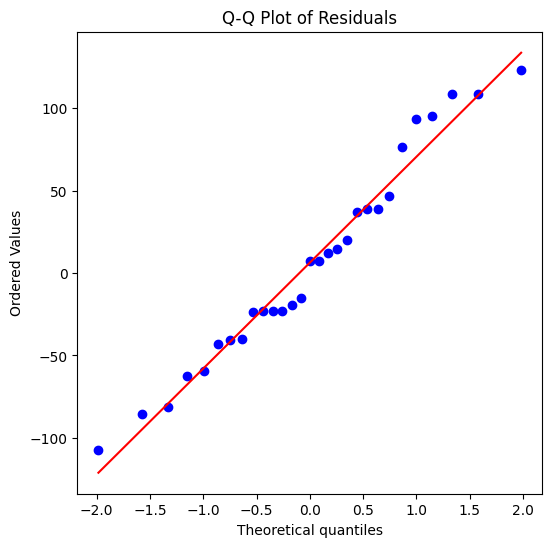

In [41]:
#predictions
y_pred = model.predict(X_test)

#residuals
residuals = y_test - y_pred

#normal probability plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals.flatten(), dist="norm", plot=plt)  # Flatten if using arrays
plt.title("Q-Q Plot of Residuals")
plt.show()

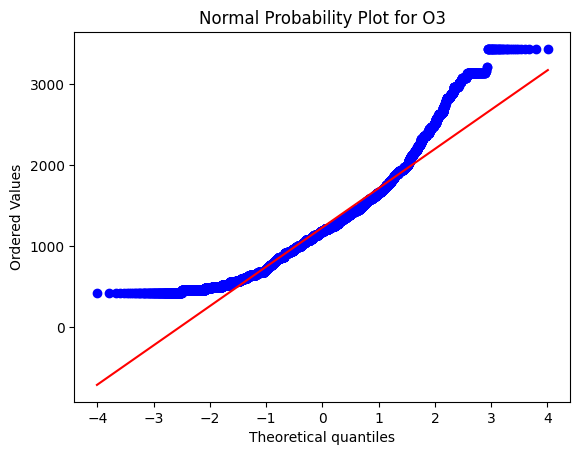

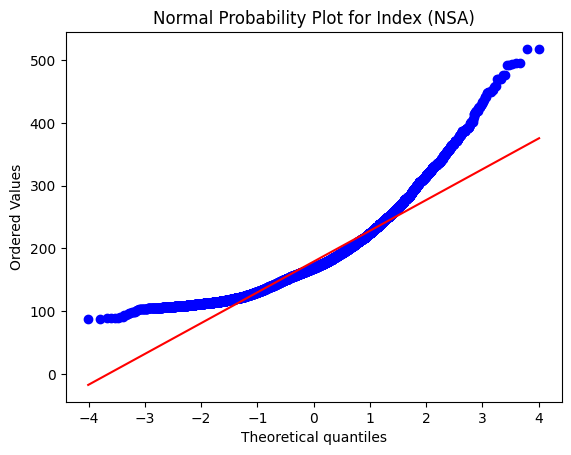

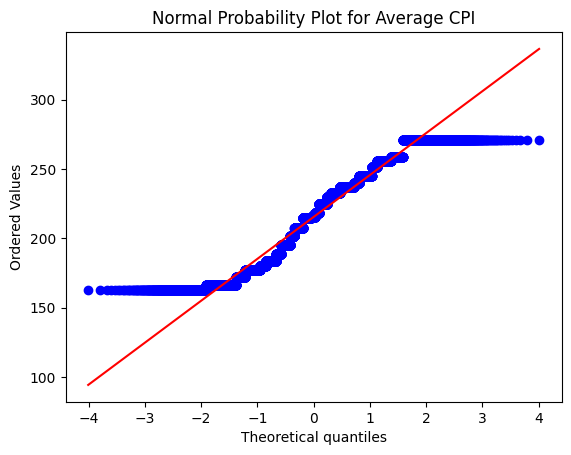

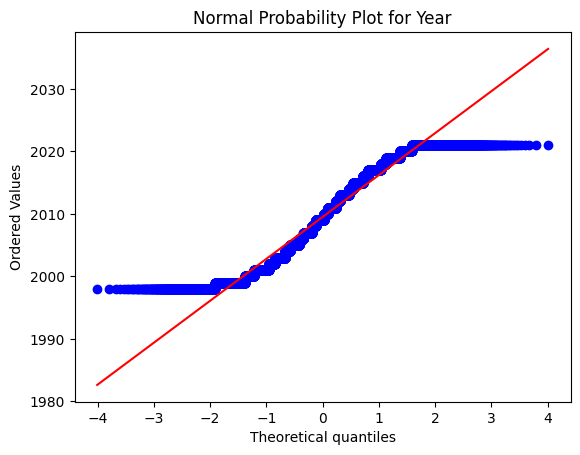

In [40]:
#residual plot
columns = ["O3", "Index (NSA)", "Average CPI", "Year"]

for col in columns:
    plt.figure()
    stats.probplot(df_clean[col], dist="norm", plot=plt)
    plt.title(f"Normal Probability Plot for {col}")
    plt.show()

In [31]:
#predict BAH from linear regression
#take in model, scaler, year, mha, cpi, index, data
#return predicted BAH value
def predict_bah_linear(model, scaler, year, mha, cpi, index_nsa, df):
    # check if the given MHA exists in the dataset
    if mha not in df["MHA"].unique():
        raise ValueError(f"MHA '{mha}' not found in dataset!")

    #prepare input features for prediction
    input_data = np.array([[year, cpi, index_nsa]])

    #normalize input using the trained scaler
    input_scaled = scaler.transform(input_data)

    #run prediction using the trained model
    predicted_bah = model.predict(input_scaled)[0]

    return predicted_bah

In [32]:
#predict linear regression BAH
predicted_bah = predict_bah_linear(model, scaler, year=2022, mha="OH231", cpi=cpi_2022, index_nsa=index_nsa_2022, df=df_clean)
print(f"Predicted BAH for OH231 in 2022: ${predicted_bah:.2f}")

Predicted BAH for OH231 in 2022: $1475.11


In [33]:
predicted_bah = predict_bah_linear(model, scaler, year=2023, mha="OH231", cpi=cpi_2023, index_nsa=index_nsa_2023, df=df_clean)
print(f"Predicted BAH for OH231 in 2023: ${predicted_bah:.2f}")

Predicted BAH for OH231 in 2023: $1523.59


In [34]:
predicted_bah = predict_bah_linear(model, scaler, year=2024, mha="OH231", cpi=cpi_2024, index_nsa=index_nsa_2024, df=df_clean)
print(f"Predicted BAH for OH231 in 2024: ${predicted_bah:.2f}")

Predicted BAH for OH231 in 2024: $1557.01


Experimentation

In [33]:
#experiment to tune hyperparameters
#take in data, rank, mha
#return dictionary of hyperparameter combos and average accuracy
def run_experiment(df, rank, mha):
    #set random seed for reproducibility
    seed_value = 42
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    np.random.seed(seed_value)
    random.seed(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    #define hyperparameter ranges
    epochs_list = [500, 1000, 1500]
    learning_rates = [0.001, 0.005, 0.0015]
    sequence_lengths = [3, 5, 7]

    #generate all hyperparameter combinations
    hyperparameter_combinations = list(product(epochs_list, learning_rates, sequence_lengths))

    #store results
    results = {}

    #run experiments
    for (epochs, lr, seq_length) in hyperparameter_combinations:
        accuracies = []

        for _ in range(5):
            #train
            model, scaler_X, scaler_y, X_test, y_test = train_bah_lstm(df, rank, mha,
                                                                       epochs=epochs,
                                                                       lr=lr,
                                                                       sequence_length=seq_length)
            #evaluate
            _, _, _, accuracy = evaluate_lstm_model(model, X_test, y_test, scaler_y)
            accuracies.append(accuracy)

        #store average accuracy
        avg_accuracy = np.mean(accuracies)
        results[(epochs, lr, seq_length)] = avg_accuracy

        print(f"Finished testing: Epochs={epochs}, LR={lr}, Seq_Len={seq_length}, Avg Accuracy={avg_accuracy:.2f}%")

    return results

In [34]:
#run experiment
experiment_results = run_experiment(df_clean, rank="O3", mha="OH231")
print(experiment_results)

Training complete!
Test RMSE: 1896.62
Test MAE: 37.37
Test R² Score: -0.0585
Prediction Accuracy (within ±5%): 82.76%
Training complete!
Test RMSE: 1510.38
Test MAE: 30.27
Test R² Score: 0.1571
Prediction Accuracy (within ±5%): 100.00%
Training complete!
Test RMSE: 2010.47
Test MAE: 39.36
Test R² Score: -0.1220
Prediction Accuracy (within ±5%): 82.76%
Training complete!
Test RMSE: 2369.36
Test MAE: 43.78
Test R² Score: -0.3223
Prediction Accuracy (within ±5%): 72.41%
Training complete!
Test RMSE: 1712.81
Test MAE: 34.67
Test R² Score: 0.0441
Prediction Accuracy (within ±5%): 96.55%
Finished testing: Epochs=500, LR=0.001, Seq_Len=3, Avg Accuracy=86.90%
Training complete!
Test RMSE: 1985.81
Test MAE: 38.73
Test R² Score: -0.0833
Prediction Accuracy (within ±5%): 85.71%
Training complete!
Test RMSE: 2158.71
Test MAE: 41.34
Test R² Score: -0.1777
Prediction Accuracy (within ±5%): 82.14%
Training complete!
Test RMSE: 1878.22
Test MAE: 37.28
Test R² Score: -0.0246
Prediction Accuracy (within

In [36]:
#find max of experiment_results
max_accuracy = max(experiment_results.values())
max_accuracy
#(1000, 0.005, 5)

93.57142857142857

In [2]:
experiment_results = {(500, 0.001, 3): 86.89655172413794, (500, 0.001, 5): 89.28571428571428, (500, 0.001, 7): 77.14285714285714, (500, 0.005, 3): 72.41379310344827, (500, 0.005, 5): 71.42857142857143, (500, 0.005, 7): 71.42857142857143, (500, 0.0015, 3): 72.41379310344827, (500, 0.0015, 5): 80.00000000000001, (500, 0.0015, 7): 71.42857142857143, (1000, 0.001, 3): 72.41379310344827, (1000, 0.001, 5): 71.42857142857143, (1000, 0.001, 7): 71.42857142857143, (1000, 0.005, 3): 82.06896551724137, (1000, 0.005, 5): 93.57142857142857, (1000, 0.005, 7): 90.0, (1000, 0.0015, 3): 72.41379310344827, (1000, 0.0015, 5): 71.42857142857143, (1000, 0.0015, 7): 71.42857142857143, (1500, 0.001, 3): 72.41379310344827, (1500, 0.001, 5): 80.00000000000001, (1500, 0.001, 7): 82.14285714285715, (1500, 0.005, 3): 93.10344827586206, (1500, 0.005, 5): 89.28571428571429, (1500, 0.005, 7): 87.14285714285714, (1500, 0.0015, 3): 84.13793103448275, (1500, 0.0015, 5): 92.85714285714286, (1500, 0.0015, 7): 85.0}

In [3]:
#find top five expiriment_results
top_five = sorted(experiment_results.items(), key=lambda x: x[1], reverse=True)[:5]
top_five

[((1000, 0.005, 5), 93.57142857142857),
 ((1500, 0.005, 3), 93.10344827586206),
 ((1500, 0.0015, 5), 92.85714285714286),
 ((1000, 0.005, 7), 90.0),
 ((1500, 0.005, 5), 89.28571428571429)]